1. Analyze the Data - We'll check for trends, seasonality, and other patterns.
2. Visualize the Price Trends - We'll plot the historical prices.
3. Build a Model for Estimation & Forecasting - We'll use a time series forecasting model: holt-winters time series model
4. Predict Prices for Any Given Date (Past/Future) - We'll allow the user to input a date and get an estimated price.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [3]:
# load data
df = pd.read_csv('Nat_Gas.csv')
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [7]:
# convert date to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], format = "%m/%d/%y")
# sort
df = df.sort_values(by="Dates").reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


In [8]:
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


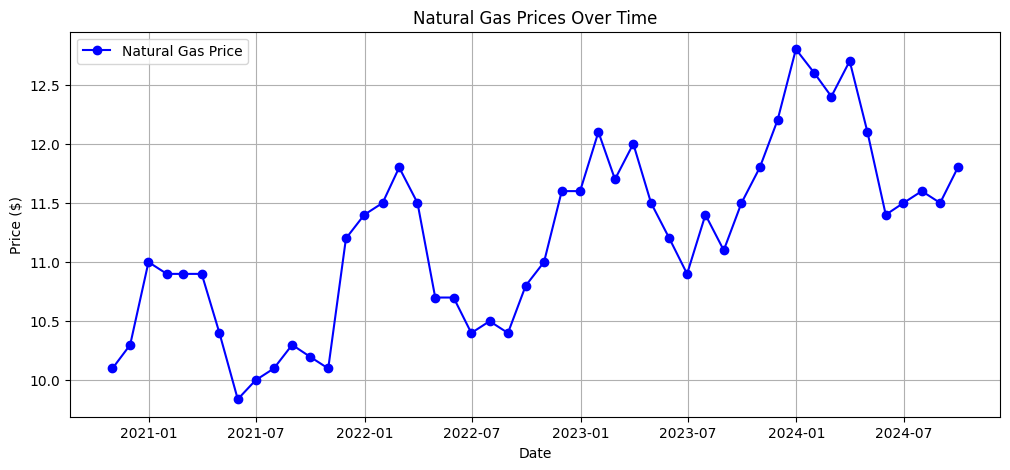

In [12]:
# visualize historical prices
plt.figure(figsize=(12,5))
plt.plot(df['Dates'],df['Prices'], marker='o', linestyle='-', label='Natural Gas Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Natural Gas Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

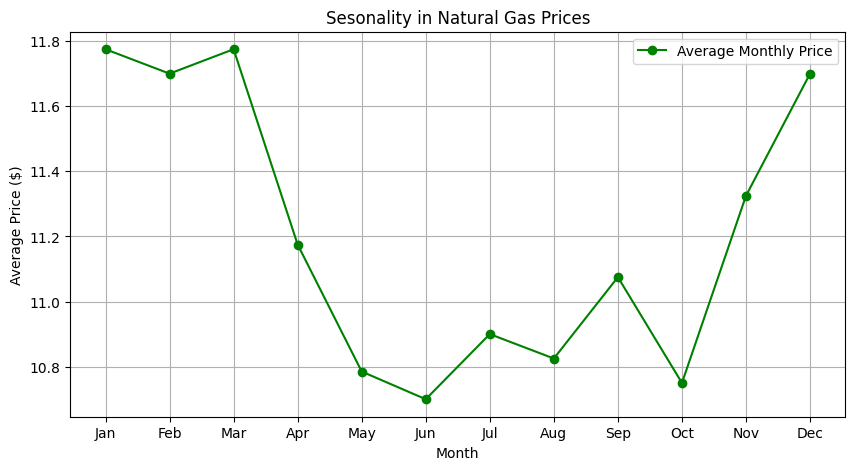

In [14]:
#Check for Seasonality
# analyze how gas price change over different months

# extract month from date
df['Month'] = df['Dates'].dt.month

# group by month to get average prices
monthly_avg_prices = df.groupby('Month')['Prices'].mean()

# plot the sesonal trend
plt.figure(figsize=(10,5))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o', linestyle='-', label='Average Monthly Price', color = 'green')

plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.title('Sesonality in Natural Gas Prices')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


We see the pattern in the gas prices here: higher prices in winter (from Nov to Mar) and lower in summer (from Apr to Oct)

# Train a time series forecasting model
Using exponential smoothing (holt-winters method) to fit the data and forecast the future prices

In [15]:
# fit model
model = ExponentialSmoothing(df['Prices'], trend = 'add', seasonal ='add', seasonal_periods =12)
fitted_model = model.fit()

In [17]:
# Forecast for the next 12 months
# create future dates
future_dates = pd.date_range(start = df['Dates'].iloc[-1] + pd.DateOffset(months = 1), periods=12, freq='M')

# generate forecasts
future_forecast = fitted_model.forecast(steps=12)

#dataframe
forecast_df = pd.DataFrame({'Date': future_dates, 'Prices': future_forecast})

forecast_df

/var/folders/57/lkbzvbp92nv6k9m7r10l7d3w0000gn/T/ipykernel_97603/1314316708.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start = df['Dates'].iloc[-1] + pd.DateOffset(months = 1), periods=12, freq='M')


,Date,Prices
48,2024-10-31,12.103782
49,2024-11-30,12.678810
50,2024-12-31,13.053791
51,2025-01-31,13.128799
52,2025-02-28,13.053792
53,2025-03-31,13.128793
54,2025-04-30,12.528778
55,2025-05-31,12.138793
56,2025-06-30,12.053780
57,2025-07-31,12.253789


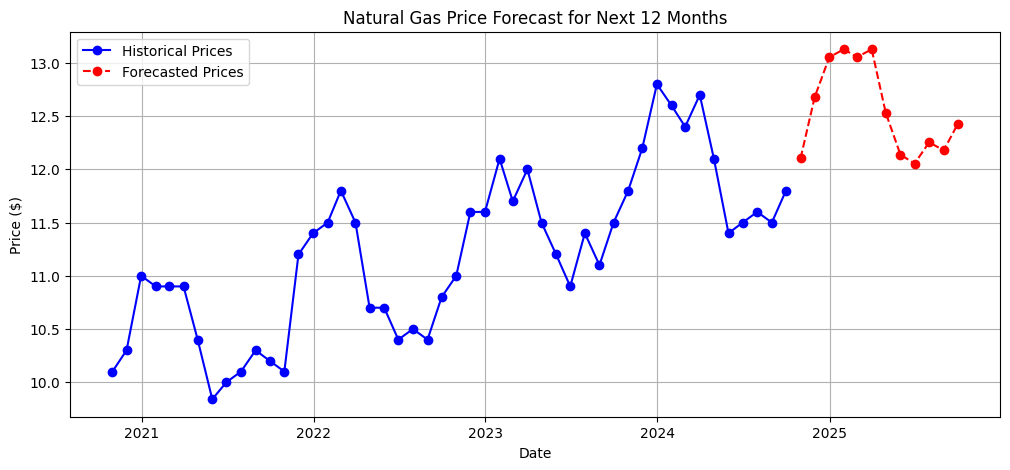

In [21]:
# plot historical and forecasted prices
extended_df = pd.concat([df, forecast_df]).reset_index(drop=True)

plt.figure(figsize = (12,5))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-', label='Historical Prices', color='blue')
plt.plot(extended_df['Date'], extended_df['Prices'], marker='o', linestyle='--', label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Natural Gas Price Forecast for Next 12 Months')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Get Price Estimates for Any Date
from scipy.interpolate import interp1d

# interpolation function
interpolator = interp1d(extended_df['Dates'].astype(int), extended_df['Prices'], kind='linear', fill_value="extrapolate")

def get_price_estimate(date_str):
    """Estimate gas price for any given date."""
    date = pd.to_datetime(date_str)
    estimated_price = float(interpolator(date.value))
    return round(estimated_price, 2)

In [28]:
date_input = "2025-06-30"  
predicted_price = get_price_estimate(date_input)
print(f"Estimated price for {date_input}: ${predicted_price}")

Estimated price for 2025-06-30: $14.53
